In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

In [2]:
sys.path.append(os.path.abspath('src/utils'))
sys.path.append(os.path.abspath('src/models'))

from movie_success_model import movie_success_index
from src.data.transform_data import raw_data, clean_data, actor_data
from plot_graphs import hist_std_config

# Profitability Factor:

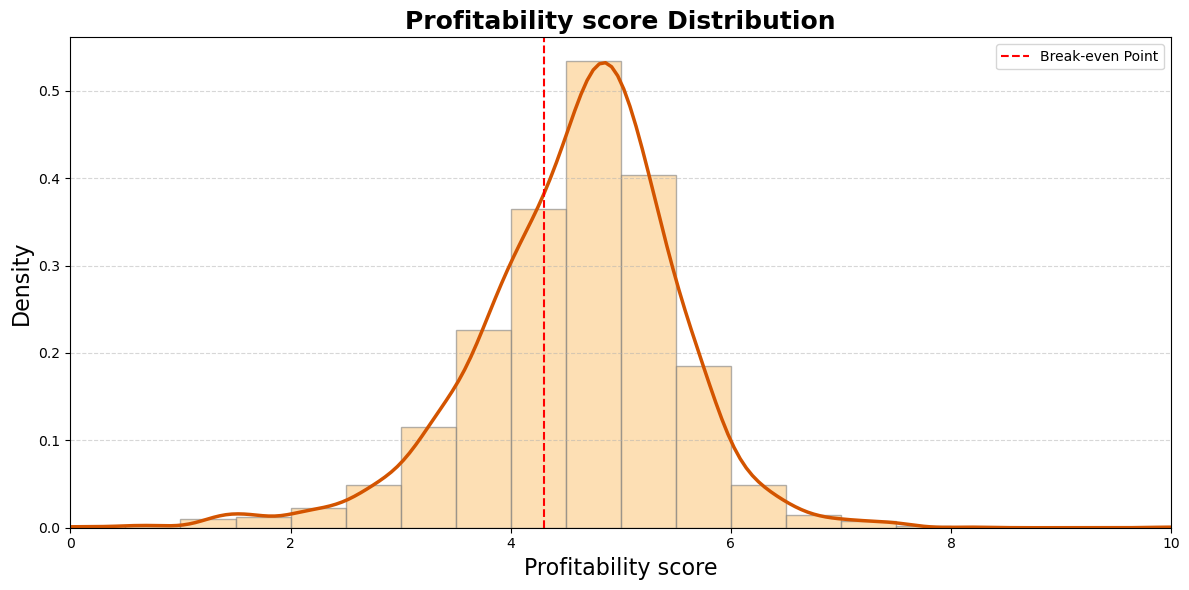

In [3]:
df = clean_data(raw_data())
movie_success_index(df)

hist_std_config(df,'Profitability score')

# Revenue factor:

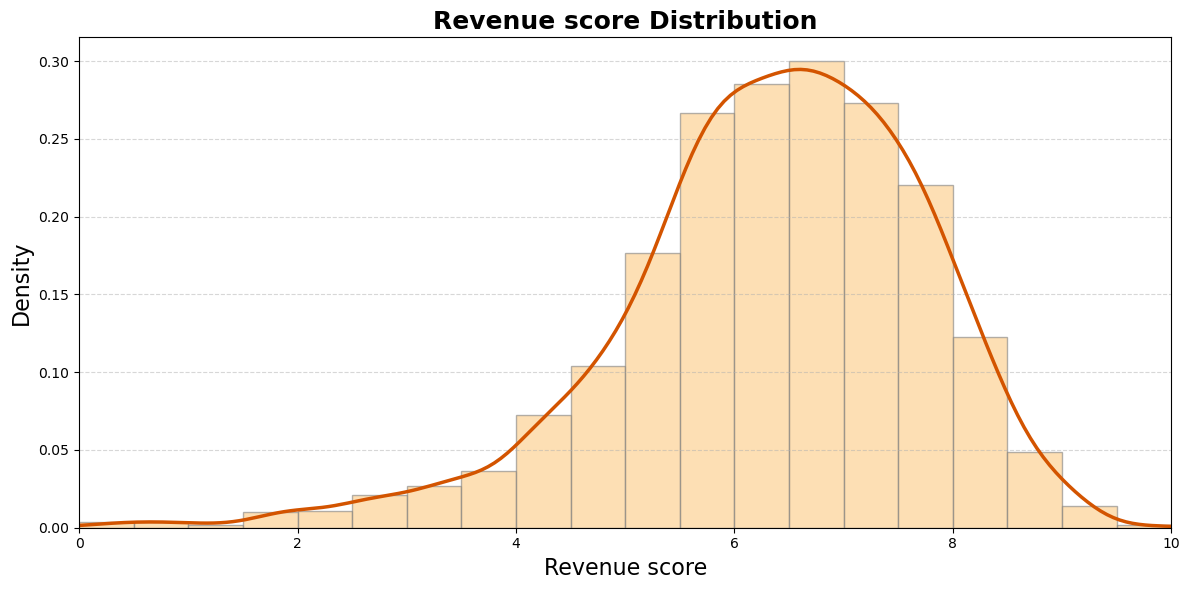

In [4]:
hist_std_config(df,'Revenue score')

# Review factor:

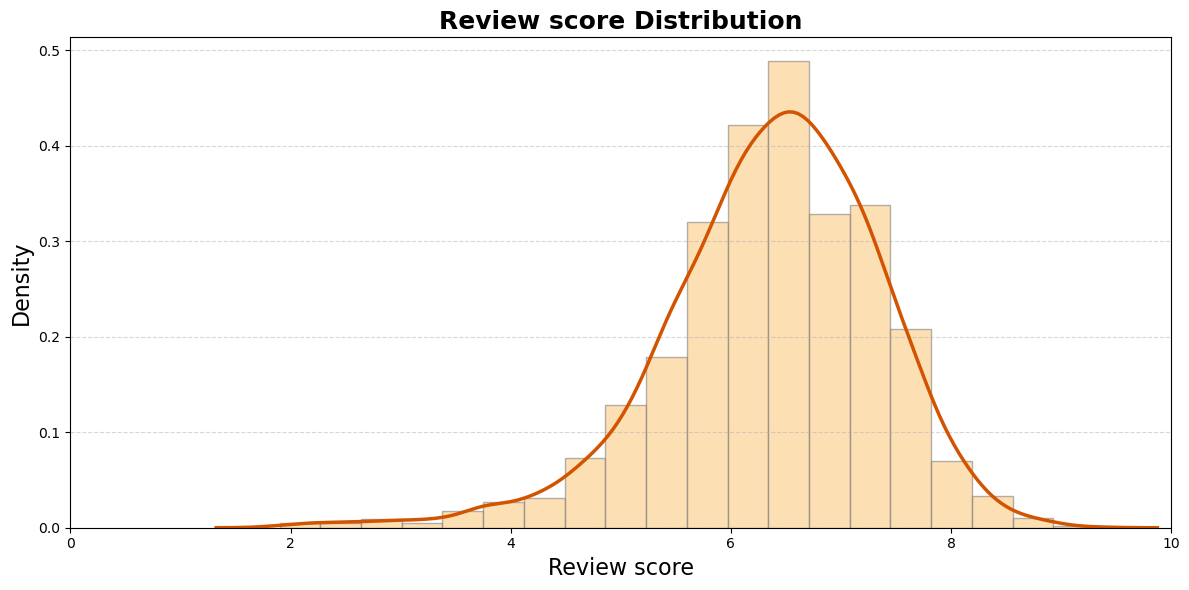

In [5]:
hist_std_config(df,'Review score')

# Oscar nomination factor:

In [6]:
# Sort data by number of nomination
nomination_count = df['Number of nomination'].astype(int).value_counts()
nomination_count

Number of nomination
0     2863
1      283
2      131
3       69
4       43
7       34
5       34
6       22
8       21
11      10
9        8
10       8
12       6
13       5
Name: count, dtype: int64

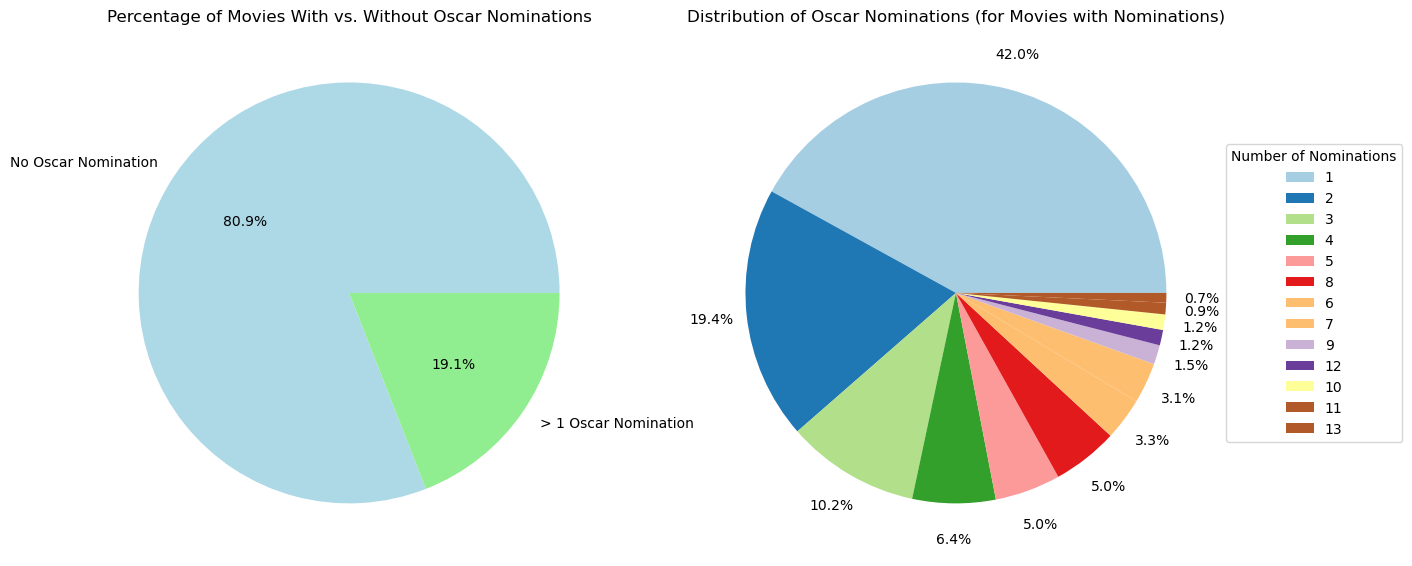

In [38]:
import matplotlib.pyplot as plt

# Create the initial nomination count
nomination_count = df['Number of nomination'].astype(int).value_counts()

# Calculate values for the first pie chart
no_nomination_count = nomination_count.get(0, 0)  # Count of movies with 0 nominations
has_nomination_count = nomination_count.sum() - no_nomination_count  # Count of movies with at least 1 nomination

# Data for the first pie chart
first_pie_labels = ['No Oscar Nomination', '> 1 Oscar Nomination']
first_pie_sizes = [no_nomination_count, has_nomination_count]

# Plot the first pie chart
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.pie(first_pie_sizes, labels=first_pie_labels, autopct='%1.1f%%', startangle=0, colors=['lightblue', 'lightgreen'])
plt.title('Percentage of Movies With vs. Without Oscar Nominations')

# Prepare data for the second pie chart
nominated_movies_count = nomination_count[nomination_count.index > 0]  # Exclude movies with 0 nominations

# Plot the second pie chart
plt.subplot(1, 2, 2)
nominated_movies_count.plot(kind='pie', autopct='%1.1f%%', startangle=0, colormap='Paired', legend=None, labels=['']*len(nominated_movies_count), pctdistance=1.17)
plt.title('Distribution of Oscar Nominations (for Movies with Nominations)')
plt.ylabel('')  # Hide y-axis label
plt.gca().set_ylabel('')
plt.gca().legend(
    labels=(nomination_count.index + 1).tolist(),  # Display the index as labels
    loc="center left", 
    bbox_to_anchor=(1, 0.5),
    title="Number of Nominations"
)

plt.tight_layout()
plt.show()

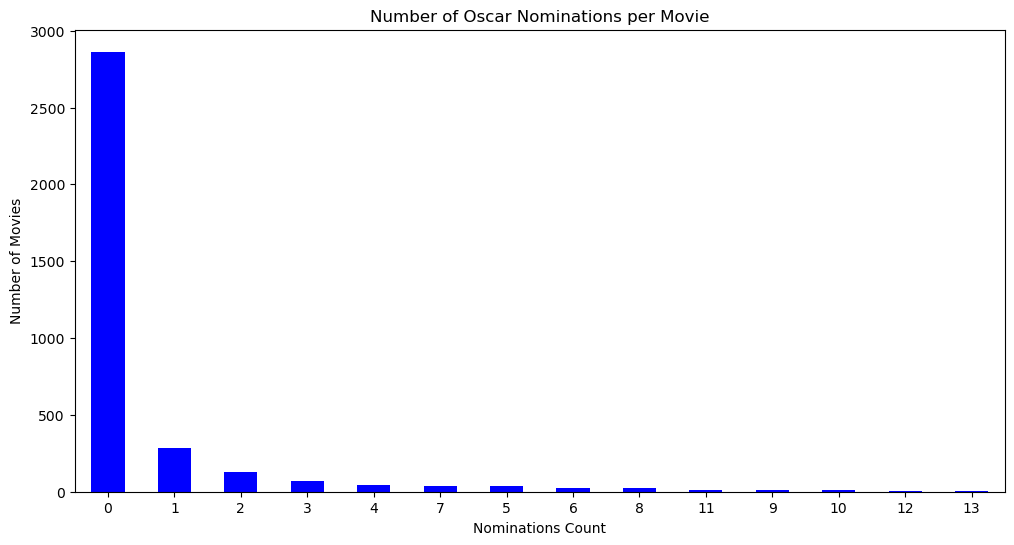

In [8]:


plt.figure(figsize=(12, 6))
nomination_count.plot(kind='bar', color='blue')
plt.title('Number of Oscar Nominations per Movie')
plt.xlabel('Nominations Count')
plt.ylabel('Number of Movies')
plt.xticks(rotation=0)
plt.show()

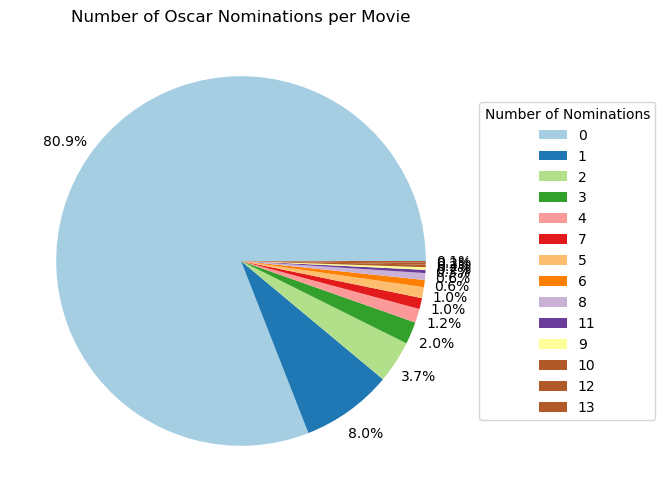

In [9]:
plt.figure(figsize=(12, 6))
# Plot the pie chart with labels outside
nomination_count.plot(
    kind='pie',
    autopct='%1.1f%%', 
    startangle=0, 
    colors=plt.cm.Paired(range(len(nomination_count))),
    pctdistance=1.15,  # Moves percentage labels slightly outward
    labels=['']*2*len(nomination_count)  # Hide index labels on chart
)
plt.title('Number of Oscar Nominations per Movie')
#plt.ylabel('')  # Hide the default y-label

# Add labels outside the pie chart
plt.gca().set_ylabel('')
plt.gca().legend(
    labels=nomination_count.index,  # Display the index as labels
    loc="center left", 
    bbox_to_anchor=(1, 0.5),
    title="Number of Nominations"
)

plt.show()

# Final Movie success index:

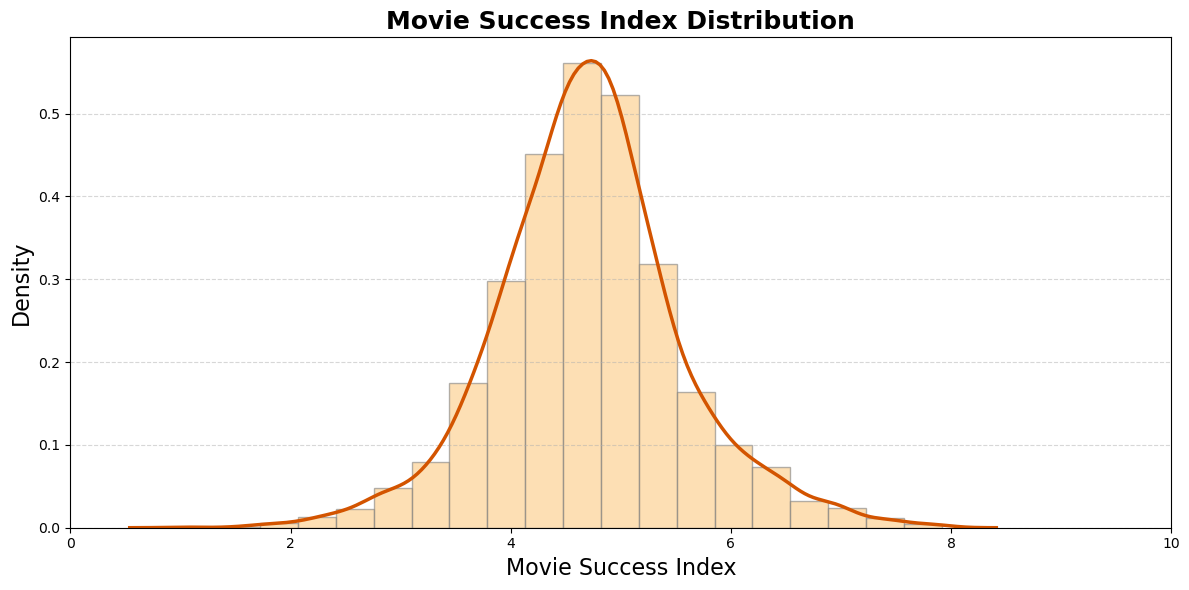

In [10]:
plt = hist_std_config(df,'Movie Success Index')